In [1]:
# Required packages
import pandas as pd
import numpy as np
import geopandas as gpd
import pickle

## Visualisation libraries

# Maps
import geoplot as gplt
import geoplot.crs as gcrs
import mplleaflet
from shapely.geometry import Point, Polygon
import folium
from folium import plugins
from folium.plugins import HeatMap

## Text
from colorama import Fore, Back, Style
from IPython.display import Image, display, Markdown, Latex, clear_output

## progressbar
import progressbar

## plotly
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.subplots import make_subplots
import plotly.express as px

## seaborn
import seaborn as sns

## matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon
from matplotlib.font_manager import FontProperties
import matplotlib.colors as mcolors
plt.style.use('seaborn-whitegrid')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-success">
<a href="https://hatefdastour.github.io/">Home</a> / 
<a href="https://hatefdastour.github.io/portfolio/real_estate/">Real Estate</a>
</div>

## King County House Sales

* [**Preprocessing**](https://hatefdastour.github.io/portfolio/real_estate/King_County_House_Sales_Preprocessing.html)
* [<font color='Green'><b>Exploratory Data Analysis</b></font>](https://hatefdastour.github.io/portfolio/real_estate/King_County_House_Sales_EDA.html)
* [**Modeling: Stacked Modeling**](https://hatefdastour.github.io/portfolio/real_estate/King_County_House_Sales_Stacked_Modeling.html)

<div class="alert alert-block alert-info"><font size="+2.5"><b>King County House Sales</b></font> </div>


In this study, we analyze and create statistical models using a dataset from [Kaggle.com](https://www.kaggle.com/shivachandel/kc-house-data). This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


### Data Description

Online property companies offer valuations of houses using machine learning techniques. This report aims to predict house sales in King County, Washington State, USA using Multiple Linear Regression (MLR). The dataset consisted of historic data of houses sold between May 2014 to May 2015. We will predict the sales of houses in King County with an accuracy of at least 75-80% and understand which factors are responsible for higher property value - $650K and above.”
The dataset consists of house prices from King County an area in the US State of Washington, this data also covers Seattle. The dataset was obtained from Kaggle*. This data was published/released under CC0*: Public Domain. Unfortunately, the user has not indicated the source of the data. Please find the citation and database description in the Glossary and Bibliography. The dataset consisted of 21 variables and 21613 observations.

### Data Columns
Attribute Information (in order):
    
| Attribute | Information | Attribute | Information |
|-------------|------------------------------------|---------------|----------------------------------------------------------------|
| id | Identification number of the house | grade | Grade given to the house |
| date | Date of the acquired information | sqft_above | The square footage of the up part of the house |
| price | Price of the house | sqft_basement | The square footage of the basement |
| bedrooms | The number of bedrooms in a house | yr_built | Built year |
| bathrooms | The number of bathrooms in a house | yr_renovated | The last renovation year |
| sqft_living | Square footage of the living area | zipcode | Zipcode |
| sqft_lot | Square footage of the lot area | lat | Latitude of the house |
| floors | The number of floors in the house | long | Longitude of the house |
| waterfront | If it has waterfront | sqft_living15 | The square footage of the living area of the 15 nearest houses |
| view | If it has view | sqft_lot15 | The square footage of the lot area of the 15 nearest houses |
| condition | Condition of the house |  |  |

Creating a dictionary for later analysis:

In [2]:
Path = 'KCData/kc_house_data.csv'

def Header(Text, L = 100, C = 'Blue', T = 'White'):
    BACK = {'Black': Back.BLACK, 'Red':Back.RED, 'Green':Back.GREEN, 'Yellow': Back.YELLOW, 'Blue': Back.BLUE,
         'Magenta':Back.MAGENTA, 'Cyan': Back.CYAN}
    FORE = {'Black': Fore.BLACK, 'Red':Fore.RED, 'Green':Fore.GREEN, 'Yellow':Fore.YELLOW, 'Blue':Fore.BLUE,
         'Magenta':Fore.MAGENTA, 'Cyan':Fore.CYAN, 'White': Fore.WHITE}
    print(BACK[C] + FORE[T] + Style.NORMAL + Text + Style.RESET_ALL + ' ' + FORE[C] +
          Style.NORMAL +  (L- len(Text) - 1)*'=' + Style.RESET_ALL)
    
def Line(L=100, C = 'Blue'):
    FORE = {'Black': Fore.BLACK, 'Red':Fore.RED, 'Green':Fore.GREEN, 'Yellow':Fore.YELLOW, 'Blue':Fore.BLUE,
         'Magenta':Fore.MAGENTA, 'Cyan':Fore.CYAN, 'White': Fore.WHITE}
    print(FORE[C] + Style.NORMAL + L*'=' + Style.RESET_ALL)

def Search_List(Key, List): return [s for s in List if Key in s]

Data = pd.read_csv(Path.split(".")[0]+'_Mod.csv')
Header('King County House Sales Dataset:')
display(Data.head())
display(pd.DataFrame({'Number of Instances': [Data.shape[0]], 'Number of Attributes': [Data.shape[1]]}).style.hide_index())

# Dictionaries
with open(Path.split(".")[0] + '_Feat_Dict.pkl', 'rb') as fp:
    Feat_Dict = pickle.load(fp)

King County House Sales Dataset: ===================================================================


id        date  year     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  2014-10-13  2014  221900.0         3       1.00         1180   
1  6414100192  2014-12-09  2014  538000.0         3       2.25         2570   
2  5631500400  2015-02-25  2015  180000.0         2       1.00          770   
3  2487200875  2014-12-09  2014  604000.0         4       3.00         1960   
4  1954400510  2015-02-18  2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0  ...      7      1180.0              0   
1      7242     2.0           0  ...      7      2170.0            400   
2     10000     1.0           0  ...      6       770.0              0   
3      5000     1.0           0  ...      7      1050.0            910   
4      8080     1.0           0  ...      8      1680.0              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 22 columns]

<div class="alert alert-block alert-success">
<font size="+2"><b>
Exploratory Data Analysis
</b></font>
</div>

First of all, the dataset includes information regarding King County house sales from 2014 to 2015. We can create two separate datasets for our analysis.

## The relationship between various attributes and the price

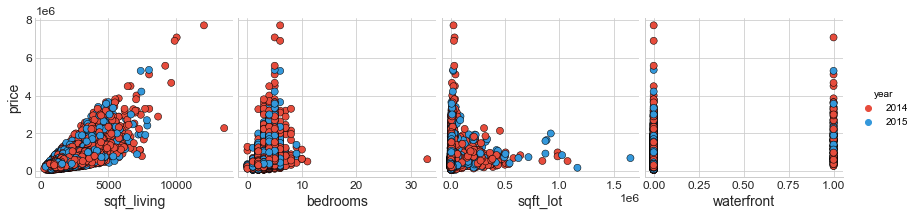

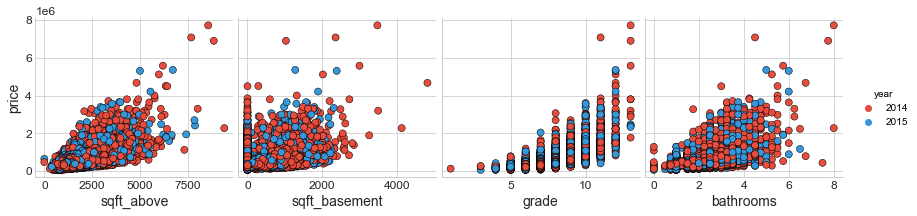

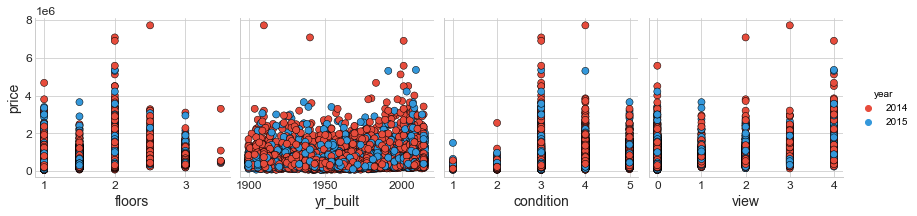

In [3]:
Temp = Data.iloc[:, 3 : 17]
mylist = list(set(Temp)-set(['price','yr_renovated']))
ind = np.arange(0,len(mylist), 4).tolist()
ind.append(len(mylist))
N = len(ind)-1

for i in range(N):
    _ = sns.pairplot(data= Data, hue= 'year', palette={2014:'#e74c3c', 2015:'#3498db'},
                     x_vars = mylist[ind[i]:ind[i+1]], y_vars = ['price'], size=3,
                     height=4, plot_kws=dict(s=50, edgecolor="k", linewidth=0.5),
                     diag_kws=dict(shade=True))
    
del N, ind, mylist, Temp

## Average Price by Living Space

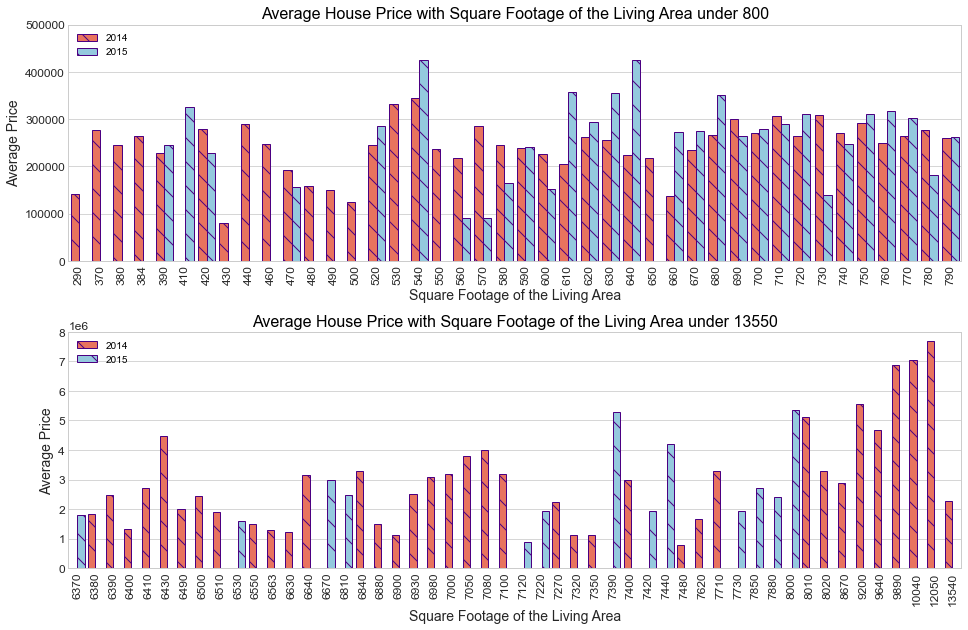

In [4]:
def SentesneCase(x):
    x = x.title()
    List = ['With', 'Top', 'Of', ' A ', 'Under', 'The']
    for w in List:
        x = x.replace(w, w.lower())
    return x

Feat = 'sqft_living'
Temp = SentesneCase(Feat_Dict[Feat])
Group = Data.groupby([Feat,'year'])['price'].agg({'mean'})
Group.columns = ['Average Price']
Group.reset_index(drop = False, inplace = True)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))

CP = sns.color_palette(['Tomato', 'SkyBlue'])
N = 70
_ = sns.barplot(x=Feat, y='Average Price', hue = 'year', palette= CP,
                edgecolor = 'indigo', hatch = '\\', data= Group.head(N), ax = ax[0])
_ = ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
_ = ax[0].set_xlabel(Temp)
_ = ax[0].set_ylim([0, 5e5])
_ = ax[0].set_title('Average House Price with %s under %i' %
                    (Temp, (Group.head(N)[Feat].max() +10)), fontsize = 16)
_ = ax[0].legend(loc='upper left')

N = 50
_ = sns.barplot(x=Feat, y='Average Price', hue = 'year', palette= CP,
                edgecolor = 'indigo', hatch = '\\', data= Group.tail(N), ax = ax[1])
_ = ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
_ = ax[1].set_xlabel(Temp)
_ = ax[1].set_ylim([0, 8e6])
_ = ax[1].set_title('Average House Price with %s under %i' %
                    (Temp, (Group.tail(N)[Feat].max() +10)), fontsize = 16)
_ = ax[1].legend(loc='upper left')
_ = plt.subplots_adjust(hspace=0.3)
del N, Group, Temp, CP, fig, ax

## Average Price by Lot Space

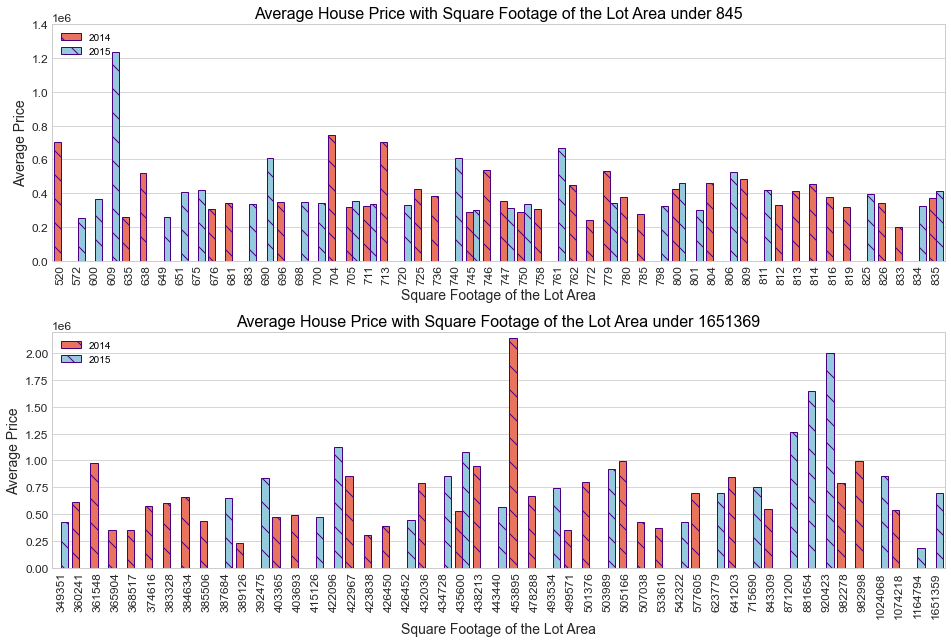

In [5]:
Feat = 'sqft_lot'
Temp = SentesneCase(Feat_Dict[Feat])
Group = Data.groupby([Feat,'year'])['price'].agg({'mean'})
Group.columns = ['Average Price']
Group.reset_index(drop = False, inplace = True)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))

CP = sns.color_palette(['Tomato', 'SkyBlue'])
N = 60
_ = sns.barplot(x=Feat, y='Average Price', hue = 'year', palette= CP,
                edgecolor = 'indigo', hatch = '\\', data= Group.head(N), ax = ax[0])
_ = ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
_ = ax[0].set_xlabel(Temp)
_ = ax[0].set_ylim([0, 1.4e6])
_ = ax[0].set_title('Average House Price with %s under %i' %
                    (Temp, (Group.head(N)[Feat].max() +10)), fontsize = 16)
_ = ax[0].legend(loc='upper left')

N = 50
_ = sns.barplot(x=Feat, y='Average Price', hue = 'year', palette= CP,
                edgecolor = 'indigo', hatch = '\\', data= Group.tail(N), ax = ax[1])
_ = ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
_ = ax[1].set_xlabel(Temp)
_ = ax[1].set_ylim([0, 2.2e6])
_ = ax[1].set_title('Average House Price with %s under %i' %
                    (Temp, (Group.tail(N)[Feat].max() +10)), fontsize = 16)
_ = ax[1].legend(loc='upper left')
_ = plt.subplots_adjust(hspace=0.3)
del N, Group, Temp, CP, fig, ax

## Average Price by Built Year

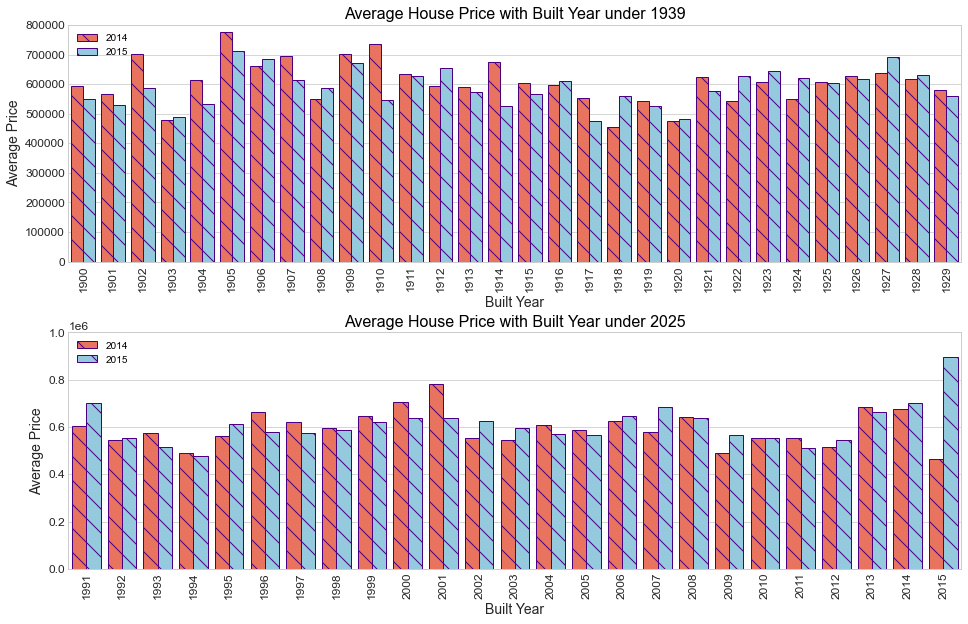

In [6]:
Feat = 'yr_built'
Temp = SentesneCase(Feat_Dict[Feat])
Group = Data.groupby([Feat,'year'])['price'].agg({'mean'})
Group.columns = ['Average Price']
Group.reset_index(drop = False, inplace = True)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))

CP = sns.color_palette(['Tomato', 'SkyBlue'])
N = 60
_ = sns.barplot(x=Feat, y='Average Price', hue = 'year', palette= CP,
                edgecolor = 'indigo', hatch = '\\', data= Group.head(N), ax = ax[0])
_ = ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
_ = ax[0].set_xlabel(Temp)
_ = ax[0].set_ylim([0, 8e5])
_ = ax[0].set_title('Average House Price with %s under %i' %
                    (Temp, (Group.head(N)[Feat].max() +10)), fontsize = 16)
_ = ax[0].legend(loc='upper left')

N = 50
_ = sns.barplot(x=Feat, y='Average Price', hue = 'year', palette= CP,
                edgecolor = 'indigo', hatch = '\\', data= Group.tail(N), ax = ax[1])
_ = ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
_ = ax[1].set_xlabel(Temp)
_ = ax[1].set_ylim([0, 1e6])
_ = ax[1].set_title('Average House Price with %s under %i' %
                    (Temp, (Group.tail(N)[Feat].max() +10)), fontsize = 16)
_ = ax[1].legend(loc='upper left')
_ = plt.subplots_adjust(hspace=0.3)
# del N, Group, Temp, CP, fig, ax

##  Average Price by the Number Bedrooms and Bathrooms

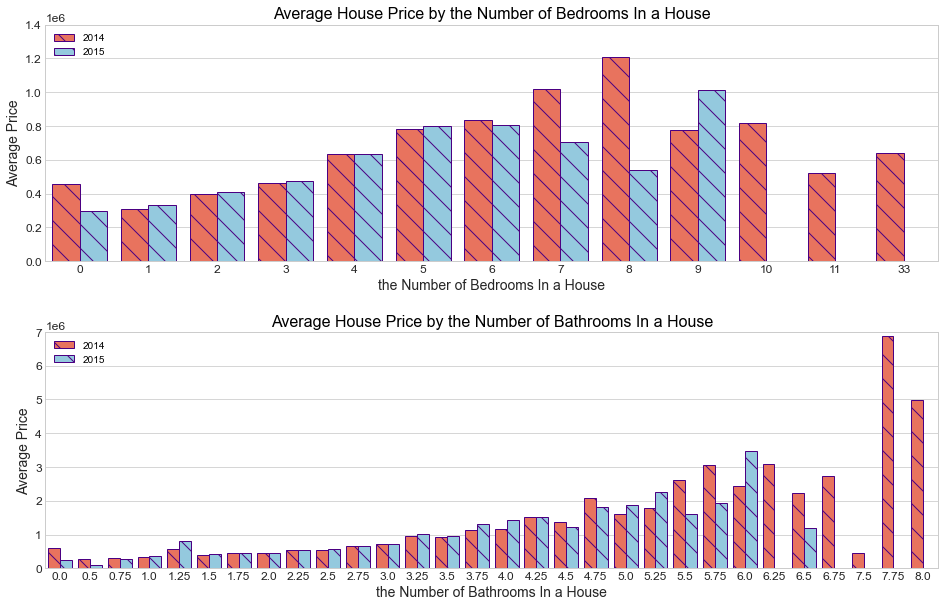

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))

CP = sns.color_palette(['Tomato', 'SkyBlue'])

Feat = 'bedrooms'
Temp = SentesneCase(Feat_Dict[Feat])
Group = Data.groupby([Feat,'year'])['price'].agg({'mean'})
Group.columns = ['Average Price']
Group.reset_index(drop = False, inplace = True)

_ = sns.barplot(x=Feat, y='Average Price', hue = 'year', palette= CP,
                edgecolor = 'indigo', hatch = '\\', data= Group, ax = ax[0])
_ = ax[0].set_xlabel(Temp)
_ = ax[0].set_ylim([0, 1.4e6])
_ = ax[0].set_title('Average House Price by %s' % Temp, fontsize = 16)
_ = ax[0].legend(loc='upper left')

Feat = 'bathrooms'
Temp = SentesneCase(Feat_Dict[Feat])
Group = Data.groupby([Feat,'year'])['price'].agg({'mean'})
Group.columns = ['Average Price']
Group.reset_index(drop = False, inplace = True)

_ = sns.barplot(x=Feat, y='Average Price', hue = 'year', palette= CP,
                edgecolor = 'indigo', hatch = '\\', data= Group, ax = ax[1])
_ = ax[1].set_xlabel(Temp)
_ = ax[1].set_ylim([0, 7e6])
_ = ax[1].set_title('Average House Price by %s' % Temp, fontsize = 16)
_ = ax[1].legend(loc='upper left')
_ = plt.subplots_adjust(hspace=0.3)

del Group, Temp, CP, fig, ax

##  Average Price by Grade and Condition

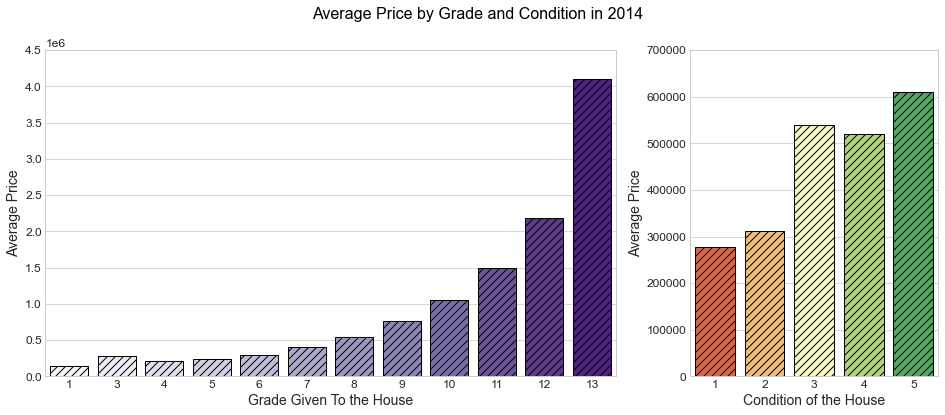

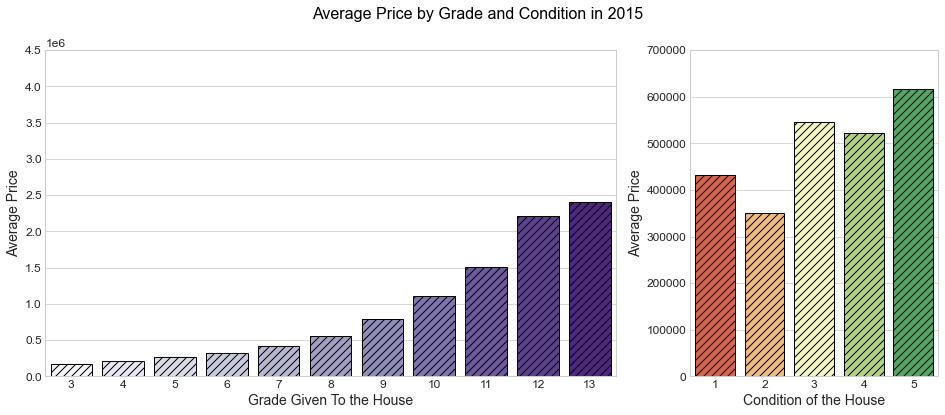

In [8]:
for y in Data.year.unique():
    Group = Data.loc[Data.year == y].groupby(['grade'])['price'].agg({'mean'})
    Group.columns = ['Average Price']
    Group.sort_values(by='grade', inplace = True)

    Group1 = Data.loc[Data.year == y].groupby(['condition'])['price'].agg({'mean'})
    Group1.columns = ['Average Price']
    Group1.sort_values(by='condition', inplace = True)

    fig = plt.figure(figsize=(16, 6), constrained_layout=True)
    gs = fig.add_gridspec(1, 3)
    ax = np.zeros(2, dtype=object)
    ax[0] = fig.add_subplot(gs[:-1])
    ax[1] = fig.add_subplot(gs[-1])
    _ = sns.barplot(ax = ax[0], x="grade", y="Average Price", palette='Purples',
                    edgecolor='k',  hatch="///", data=Group.reset_index(drop = False))
    _ = ax[0].set_ylabel('Average Price')
    _ = ax[0].set_xlabel(SentesneCase(Feat_Dict['grade']))
    _ = ax[0].set_ylim([0,4.5e6])

    _ = sns.barplot(ax = ax[1], x="condition", y="Average Price", palette='RdYlGn',
                    edgecolor='k',  hatch="///", data=Group1.reset_index(drop = False))
    _ = ax[1].set_ylabel('Average Price')
    _ = ax[1].set_xlabel(SentesneCase(Feat_Dict['condition']))
    _ = ax[1].set_ylim([0,7e5])

    _ = fig.suptitle('Average Price by Grade and Condition in %i' % y, fontsize = 16)
    plt.subplots_adjust(wspace= .3)
    del y, Group, Group1, fig, ax, gs

##  Price and Location

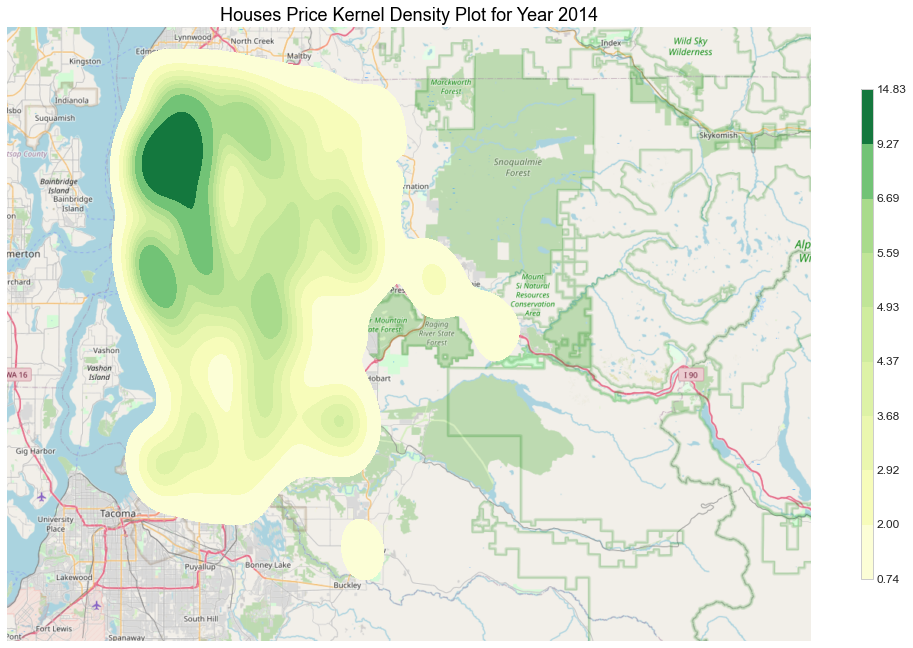

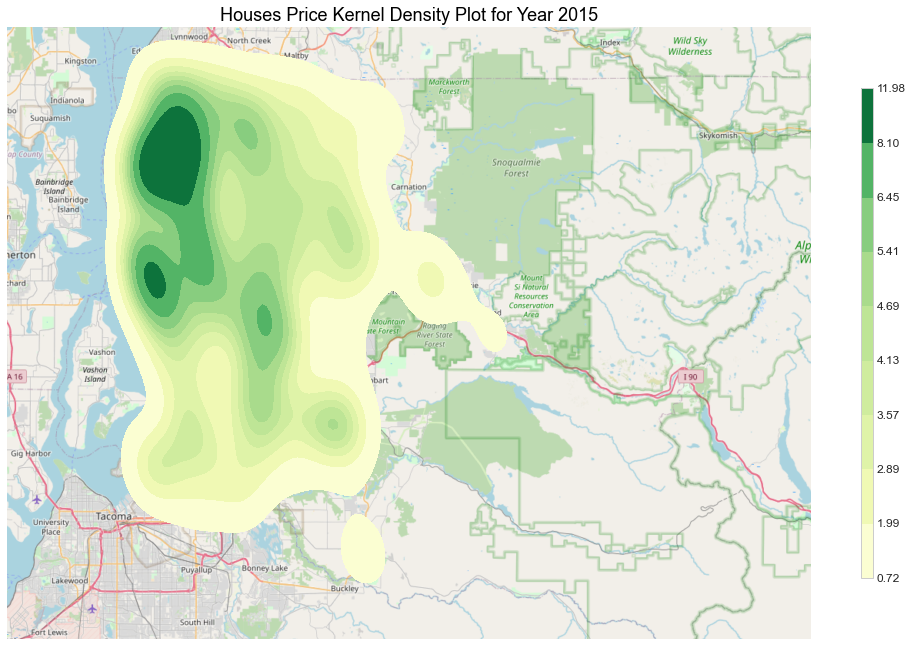

In [9]:
for y in Data.year.unique():
    Group = Data.loc[Data.year == y]      
    geometry = [Point(xy) for xy in zip(Group.long, Group.lat)]
#     crs = {'init':'epsg:4326'}
#     geo_df = gpd.GeoDataFrame(Group, crs = crs, geometry = geometry)
    geo_df = gpd.GeoDataFrame(Group, geometry = geometry)
    Group = geo_df[['price','geometry']]
    ax = gplt.kdeplot(Group, cmap='YlGn', projection=gcrs.WebMercator(), figsize=(18, 18), shade=True,
                  cbar =True, cbar_kws={'shrink': .5, "aspect":40})
#     gplt.pointplot(Group, s=1, color='black', ax=ax)
    cs = gplt.webmap(Group, ax=ax)
    _ = ax.set_title('Houses Price Kernel Density Plot for Year %i' %y, fontsize=18)

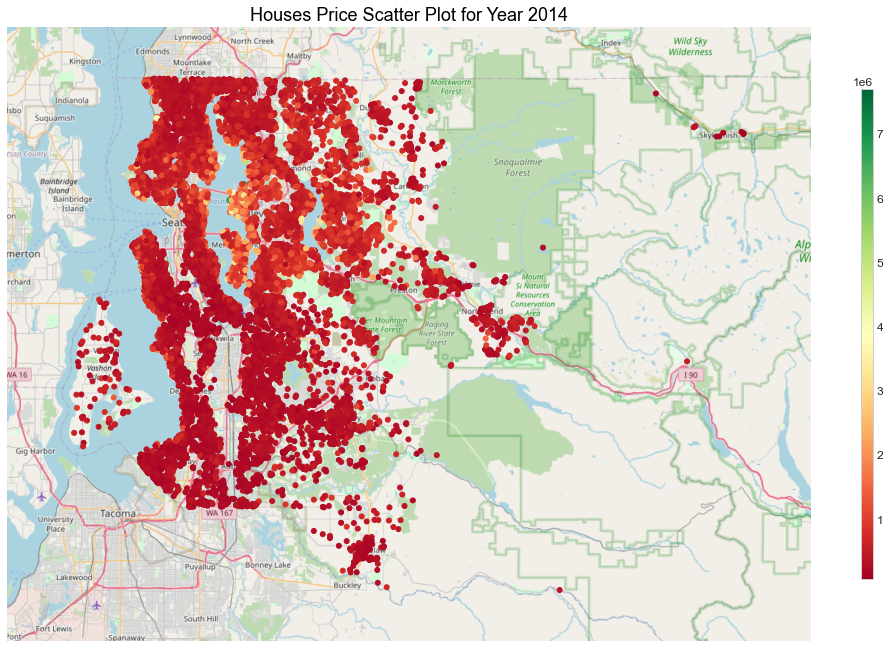

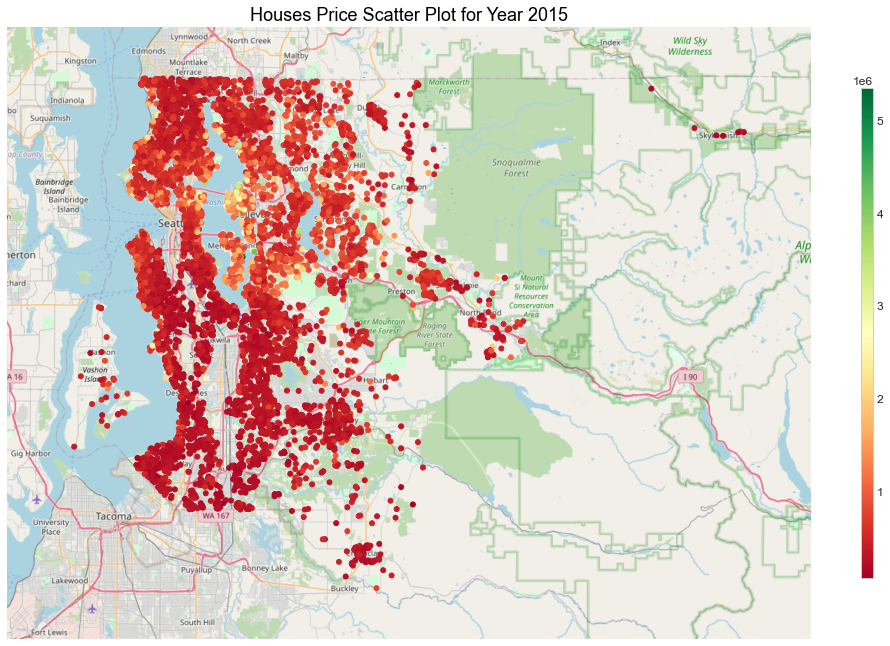

In [10]:
for y in Data.year.unique():
    Group = Data.loc[Data.year == y]      
    geometry = [Point(xy) for xy in zip(Group.long, Group.lat)]
#     crs = {'init':'epsg:4326'}
#     geo_df = gpd.GeoDataFrame(Group, crs = crs, geometry = geometry)
    geo_df = gpd.GeoDataFrame(Group, geometry = geometry)
    Group = geo_df[['price','geometry']]
    ax = gplt.pointplot(Group, hue='price', cmap='RdYlGn',figsize=(18, 18), projection=gcrs.WebMercator(),
                        legend=True, legend_kwargs={'shrink': .5, "aspect":40})
#     gplt.pointplot(Group, s=1, color='black', ax=ax)
    cs = gplt.webmap(Group, ax=ax)
    _ = ax.set_title('Houses Price Scatter Plot for Year %i' %y, fontsize=18)

## The Most Expensive Houses

In [11]:
Top = 15
for y in Data.year.unique():
    Group = Data.loc[Data.year == y].sort_values(by='price', ascending=False).reset_index(drop =True)[:Top]
    m = folium.Map([Group.lat.mean(), Group.long.mean()], zoom_start = 10.5)
    for i in range(len(Group)):
        Inp=Group[i:(i+1)]
        St = '(Value:' + str(Inp.price.values[0])+', Grade:' + str(Inp.grade.values[0]) + ')'
        folium.Marker(location=[Inp.lat.values[0], Inp.long.values[0]], popup = St, 
                      icon=folium.Icon(color='blue',icon='building', prefix='fa') ).add_to(m)
    display(m)

***
# References

1. [Kaggle Dataset: King County House Sales](https://www.kaggle.com/shivachandel/kc-house-data)
***